In [23]:
from utils.CIFAR import CIFAR10Dataset
from search_spaces.radar.radar_node import RadarCell
import numpy as np
cell = RadarCell(4)
while not cell.is_complete():
    print(cell.get_action_tuples())
    cell.play_action(*cell.get_action_tuples()[np.random.randint(1, len(cell.get_action_tuples()))])
cell.plot()
# dataset = CIFAR10Dataset()
# print(cell.get_multiobjective_reward(dataset))

[(1, 0, 'none'), (1, 0, 'skip_connect'), (1, 0, 'nor_conv_1x1'), (1, 0, 'nor_conv_3x3'), (1, 0, 'avg_pool_3x3'), (2, 0, 'none'), (2, 0, 'skip_connect'), (2, 0, 'nor_conv_1x1'), (2, 0, 'nor_conv_3x3'), (2, 0, 'avg_pool_3x3'), (2, 1, 'none'), (2, 1, 'skip_connect'), (2, 1, 'nor_conv_1x1'), (2, 1, 'nor_conv_3x3'), (2, 1, 'avg_pool_3x3'), (3, 0, 'none'), (3, 0, 'skip_connect'), (3, 0, 'nor_conv_1x1'), (3, 0, 'nor_conv_3x3'), (3, 0, 'avg_pool_3x3'), (3, 1, 'none'), (3, 1, 'skip_connect'), (3, 1, 'nor_conv_1x1'), (3, 1, 'nor_conv_3x3'), (3, 1, 'avg_pool_3x3'), (3, 2, 'none'), (3, 2, 'skip_connect'), (3, 2, 'nor_conv_1x1'), (3, 2, 'nor_conv_3x3'), (3, 2, 'avg_pool_3x3')]
[(2, 0, 'none'), (2, 0, 'skip_connect'), (2, 0, 'nor_conv_1x1'), (2, 0, 'nor_conv_3x3'), (2, 0, 'avg_pool_3x3'), (2, 1, 'none'), (2, 1, 'skip_connect'), (2, 1, 'nor_conv_1x1'), (2, 1, 'nor_conv_3x3'), (2, 1, 'avg_pool_3x3'), (3, 0, 'none'), (3, 0, 'skip_connect'), (3, 0, 'nor_conv_1x1'), (3, 0, 'nor_conv_3x3'), (3, 0, 'avg_po

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905],
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143],
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952,
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286],
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238,
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571],
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571,
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429],
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667,
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286],
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571,
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429],
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524,
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048,
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667],
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381,
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381],
 [0.0589714286, 0.6837571429, 0.7253857143],
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429],
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429,
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048],
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619,
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667],
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524,
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905],
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476,
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143],
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333],
 [0.7184095238, 0.7411333333, 0.3904761905],
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667,
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762],
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217],
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857,
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619],
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857,
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381],
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857],
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309],
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333,
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333],
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

([], [])

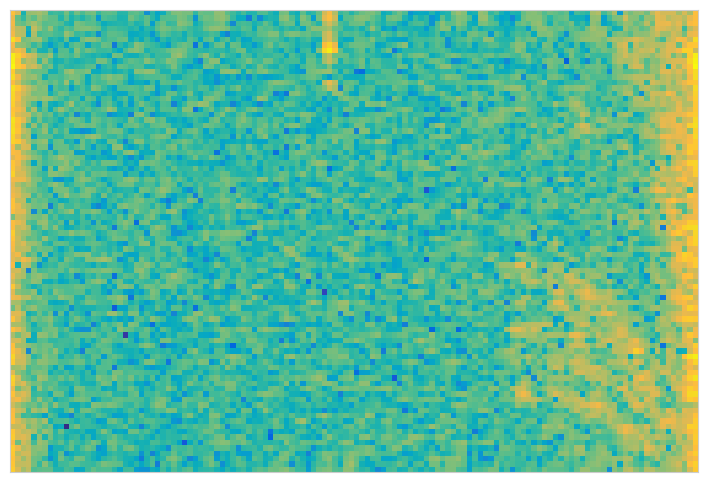

In [57]:
random_index = np.random.randint(0, 100)
card = np.array(loadmat(f"/home/lam/projets/multi_objective/data/radar/mydb/mat/carte{random_index}.mat")["signal_db"])
label = np.array(loadmat(f"/home/lam/projets/multi_objective/data/radar/mydb/mat/label{random_index}.mat")["label"])
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.grid(False)
ax.imshow(card.squeeze(), cmap=parula_map)
plt.xticks([]); plt.yticks([])

In [18]:
label

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)